In [2]:
#imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Read in shark attacks file 
shark_attack_to_load = Path("global-shark-attack.xlsx")
shark_data = pd.read_excel(shark_attack_to_load)
shark_data

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,NaN,1,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,NaN,...,N,NaN,NaN,Waverly Library,5BC-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5BC-Australia,5BC,131.0
1,NaN,1000,Unprovoked,USA,Puerto Rico,Archeological site,NaN,male,M,29,...,N,NaN,Tiger shark,P. Seigel,1000AD-PuertoRico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1000.00.00,1000.00.00,133.0
2,NaN,1500,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,...,N,NaN,NaN,J. Castro,1200AD-Mexico.pdf,1200AD-Mexico.pdf,1200AD-Mexico.pdf,1200.00.00,1200.00.00,134.0
3,NaN,1518,Unprovoked,MEXICO,Yucatan,Cozumel,Swmming,A cacique (a chief),M,NaN,...,N,NaN,NaN,"C. Moore, GSAF",1518.04.00.R.chief.pdf,1518.04.00.R-chief.pdf,1518.04.00.R-chief.pdf,1518.04.00.R,1518.04.00.R,135.0
4,NaN,1543,Unprovoked,VENEZUELA,Magarita or Cubagua Islands,NaN,Pearl diving,Indian slave,M,NaN,...,Y,NaN,NaN,J. Castro,1543.00.00.R-LasCasas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1543.00.00,1543.00.00,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6185,2023-08-16,2023,Provoked,PORTUGAL,Norte,9 nm off Vila do Conde,Fishing,male,M,35,...,N,19h30,Blue shark,"Portugese Resident, 8/17/2023",NaN,NaN,NaN,NaN,NaN,NaN
6186,2023-08-16,2023,Unprovoked,SPAIN,Valencia,Rabdells Beach,Wading,male,M,NaN,...,N,Afternoon,Blue shark,Las Provincias,NaN,NaN,NaN,NaN,NaN,NaN
6187,NaN,2023,Unprovoked,NEW CALEDONIA,South Province,"Chateau Royal Beach, Noumea",Swimming,Brigitte Soulard,M,49,...,N,10h30,Bull shark,"Les Nouvelles Caledoinnie, 1/30/2023",NaN,NaN,NaN,NaN,NaN,NaN
6188,NaN,2023,Unprovoked,USA,Florida,"Outer Mole, Fort Zachrry Tatlor Historic Park,...",Swimming,Nicolae Cioban,M,34,...,N,14h00,NaN,"Miami Herald, 1/14/2023",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Data cleaning 

#Check for nonstandard sex values 
shark_data['Sex'].unique()

#Drop values 
values_to_drop= ['.','M x 2', 'lli', 'N']

for value in values_to_drop:
    shark_data = shark_data.drop(shark_data[shark_data['Sex']== value].index)

shark_data = shark_data.dropna(subset = 'Sex')

shark_data

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,NaN,1,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,NaN,...,N,NaN,NaN,Waverly Library,5BC-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5BC-Australia,5BC,131.0
1,NaN,1000,Unprovoked,USA,Puerto Rico,Archeological site,NaN,male,M,29,...,N,NaN,Tiger shark,P. Seigel,1000AD-PuertoRico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1000.00.00,1000.00.00,133.0
2,NaN,1500,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,...,N,NaN,NaN,J. Castro,1200AD-Mexico.pdf,1200AD-Mexico.pdf,1200AD-Mexico.pdf,1200.00.00,1200.00.00,134.0
3,NaN,1518,Unprovoked,MEXICO,Yucatan,Cozumel,Swmming,A cacique (a chief),M,NaN,...,N,NaN,NaN,"C. Moore, GSAF",1518.04.00.R.chief.pdf,1518.04.00.R-chief.pdf,1518.04.00.R-chief.pdf,1518.04.00.R,1518.04.00.R,135.0
4,NaN,1543,Unprovoked,VENEZUELA,Magarita or Cubagua Islands,NaN,Pearl diving,Indian slave,M,NaN,...,Y,NaN,NaN,J. Castro,1543.00.00.R-LasCasas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1543.00.00,1543.00.00,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6185,2023-08-16,2023,Provoked,PORTUGAL,Norte,9 nm off Vila do Conde,Fishing,male,M,35,...,N,19h30,Blue shark,"Portugese Resident, 8/17/2023",NaN,NaN,NaN,NaN,NaN,NaN
6186,2023-08-16,2023,Unprovoked,SPAIN,Valencia,Rabdells Beach,Wading,male,M,NaN,...,N,Afternoon,Blue shark,Las Provincias,NaN,NaN,NaN,NaN,NaN,NaN
6187,NaN,2023,Unprovoked,NEW CALEDONIA,South Province,"Chateau Royal Beach, Noumea",Swimming,Brigitte Soulard,M,49,...,N,10h30,Bull shark,"Les Nouvelles Caledoinnie, 1/30/2023",NaN,NaN,NaN,NaN,NaN,NaN
6188,NaN,2023,Unprovoked,USA,Florida,"Outer Mole, Fort Zachrry Tatlor Historic Park,...",Swimming,Nicolae Cioban,M,34,...,N,14h00,NaN,"Miami Herald, 1/14/2023",NaN,NaN,NaN,NaN,NaN,NaN


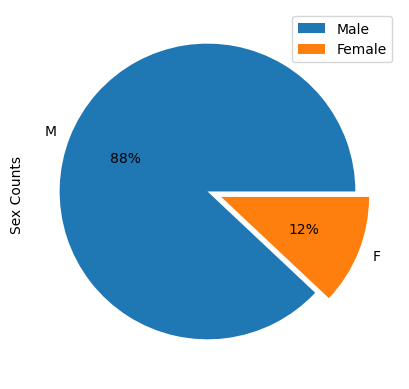

In [36]:
#Count number of males vs. females
sex_series = shark_data['Sex'].value_counts()
#Plot pie chart 
explode= (0.05,0.05)
sex_series.plot(kind = 'pie', ylabel='Sex Counts', autopct = '%1.0f%%', explode =explode)
plt.legend(["Male", "Female"])

In [62]:
#Creating dataframe for bar chart
#Filtering into Male and Female dataframes 
female_filt =(shark_data['Sex'] == 'F')
male_filt =(shark_data['Sex'] == 'M')

female_df=shark_data[female_filt]
male_df=shark_data[male_filt]

#Creating data frames with counts of types by sex
type_f_df = pd.DataFrame(female_df['Type'].value_counts())
type_m_df = pd.DataFrame(male_df['Type'].value_counts())

#Renaming columns for merge
type_f_df.rename(columns={'count':'Female'},inplace = True)
type_m_df.rename(columns={'count':'Male'},inplace = True)


#Joining dataframes 
m_f_type_df = type_f_df.join(type_m_df,how='outer')
m_f_type_df

,Female,Male
Type,,
Unprovoked,633,4161
Provoked,31,536
Sea Disaster,9,162
Watercraft,9,137
Questionable,2,14


<Axes: xlabel='Type'>

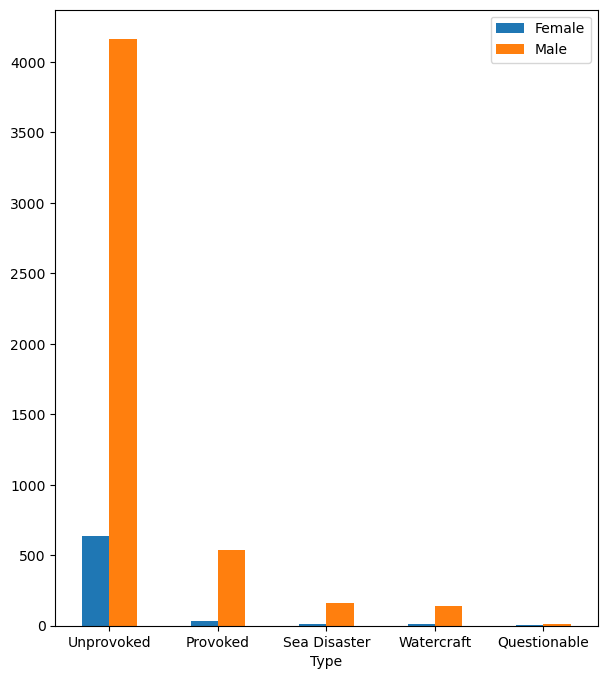

In [81]:
#Bar chart for type of attack by sex
m_f_type_df.plot.bar(rot=0, figsize=(7, 8))

<Axes: xlabel='Type'>

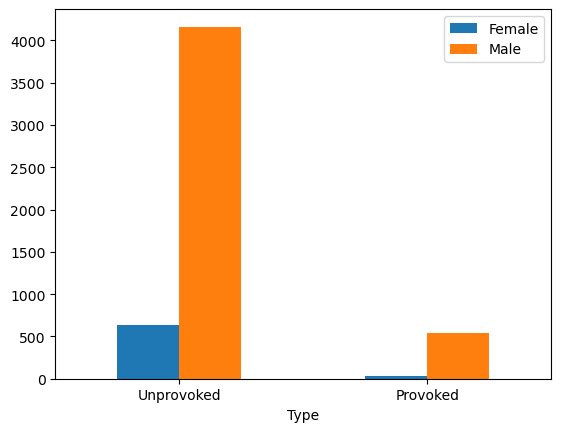

In [82]:
#Bar chart for provoked vs unprovoked by sex
m_f_type_df.iloc[[0,1]].plot.bar(rot=0)

In [98]:
#Creating data frames with counts by sex broken up by country
type_f_df = pd.DataFrame(female_df['Country'].value_counts())
type_m_df = pd.DataFrame(male_df['Country'].value_counts())

#Renaming columns for merge
type_f_df.rename(columns={'count':'Female'},inplace = True)
type_m_df.rename(columns={'count':'Male'},inplace = True)


#Joining dataframes 
m_f_type_country_df = type_f_df.join(type_m_df,how='outer')
#Sorting dataframe and keeping the top 20 countries to graph
m_f_type_country_df=m_f_type_country_df.sort_values(by =['Male'],ascending=False).iloc[:19]

<Axes: xlabel='Country'>

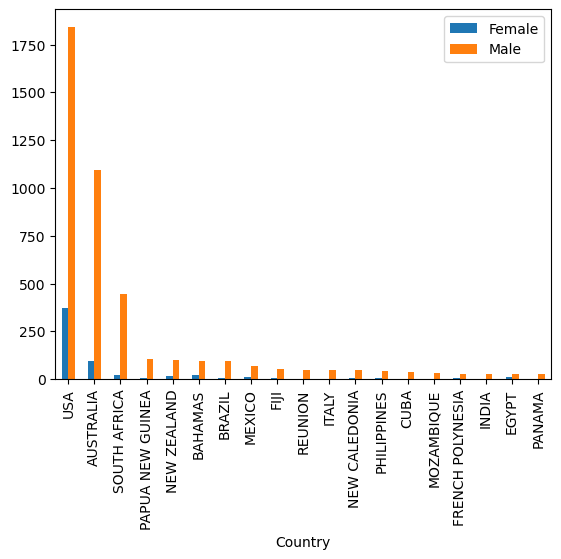

In [99]:
m_f_type_country_df.plot.bar()